# 第三章 PyTorch基礎：Tensor和Autograd

## 3.1 Tensor

Tensor，又名張量，讀者可能對這個名詞似曾相識，因它不僅在PyTorch中出現過，它也是Theano、TensorFlow、
Torch和MxNet中重要的資料結構。關於張量的本質不乏深度的剖析，但從工程角度來講，可簡單地認為它就是一個陣列，且支援高效的科學計算。它可以是一個數（標量）、一維陣列（向量）、二維陣列（矩陣）和更高維的陣列（高階資料）。Tensor和Numpy的ndarrays類似，但PyTorch的tensor支援GPU加速。

本節將系統講解tensor的使用，力求面面俱到，但不會涉及每個函數。對於更多函數及其用法，讀者可通過在IPython/Notebook中使用函數名加`?`查看幫助文檔，或查閱PyTorch官方文檔[^1]。

[^1]: http://docs.pytorch.org

In [1]:
# Let's begin
from __future__ import print_function
import torch  as t
t.__version__

'0.3.1b0+2b47480'

###  3.1.1 基礎操作

學習過Numpy的讀者會對本節內容感到非常熟悉，因tensor的介面有意設計成與Numpy類似，以方便用戶使用。但不熟悉Numpy也沒關係，本節內容並不要求先掌握Numpy。

從介面的角度來講，對tensor的操作可分為兩類：

1. `torch.function`，如`torch.save`等。
2. 另一類是`tensor.function`，如`tensor.view`等。

為方便使用，對tensor的大部分操作同時支援這兩類介面，在本書中不做具體區分，如`torch.sum (torch.sum(a, b))`與`tensor.sum (a.sum(b))`功能等價。

而從存儲的角度來講，對tensor的操作又可分為兩類：

1. 不會修改自身的資料，如 `a.add(b)`， 加法的結果會返回一個新的tensor。
2. 會修改自身的資料，如 `a.add_(b)`， 加法的結果仍存儲在a中，a被修改了。

函數名以`_`結尾的都是inplace方式, 即會修改調用者自己的資料，在實際應用中需加以區分。

#### 創建Tensor

在PyTorch中新建tensor的方法有很多，具體如表3-1所示。

表3-1: 常見新建tensor的方法

|函數|功能|
|:---:|:---:|
|Tensor(\*sizes)|基礎構造函數|
|ones(\*sizes)|全1Tensor|
|zeros(\*sizes)|全0Tensor|
|eye(\*sizes)|對角線為1，其他為0|
|arange(s,e,step|從s到e，步長為step|
|linspace(s,e,steps)|從s到e，均勻切分成steps份|
|rand/randn(\*sizes)|均勻/標準分佈|
|normal(mean,std)/uniform(from,to)|正態分佈/均勻分佈|
|randperm(m)|隨機排列|

其中使用`Tensor`函數新建tensor是最複雜多變的方式，它既可以接收一個list，並根據list的資料新建tensor，也能根據指定的形狀新建tensor，還能傳入其他的tensor，下面舉幾個例子。

In [2]:
# 指定tensor的形狀
a = t.Tensor(2, 3)
a # 數值取決於記憶體空間的狀態


1.00000e-25 *
 -2.3497  0.0000 -2.2373
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 2x3]

In [3]:
# 用list的資料創建tensor
b = t.Tensor([[1,2,3],[4,5,6]])
b


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]

In [4]:
b.tolist() # 把tensor轉為list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

`tensor.size()`返回`torch.Size`物件，它是tuple的子類，但其使用方式與tuple略有區別

In [5]:
b_size = b.size()
b_size

torch.Size([2, 3])

In [6]:
b.numel() # b中元素總個數，2*3，等價於b.nelement()

6

In [7]:
# 創建一個和b形狀一樣的tensor
c = t.Tensor(b_size)
# 創建一個元素為2和3的tensor
d = t.Tensor((2, 3))
c, d

(
 1.00000e-25 *
  -2.3476  0.0000  0.0000
   0.0000  0.0000  0.0000
 [torch.FloatTensor of size 2x3], 
  2
  3
 [torch.FloatTensor of size 2])

除了`tensor.size()`，還可以利用`tensor.shape`直接查看tensor的形狀，`tensor.shape`等價於`tensor.size()`

In [8]:
c.shape

torch.Size([2, 3])

In [9]:
c.shape??

Type:        property
String form: <property object at 0x7f7b4e90b228>
Source:     
# c.shape.fget
@property
def shape(self):
    r"""Alias for .size()

    Returns a torch.Size object, containing the dimensions of the
    :attr:`self` Tensor.
    """
    return self.size()


需要注意的是，`t.Tensor(*sizes)`創建tensor時，系統不會馬上分配空間，只是會計算剩餘的記憶體是否足夠使用，使用到tensor時才會分配，而其它操作都是在創建完tensor之後馬上進行空間分配。其它常用的創建tensor的方法舉例如下。

In [10]:
t.ones(2, 3)


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [11]:
t.zeros(2, 3)


 0  0  0
 0  0  0
[torch.FloatTensor of size 2x3]

In [12]:
t.arange(1, 6, 2)


 1
 3
 5
[torch.FloatTensor of size 3]

In [13]:
t.linspace(1, 10, 3)


  1.0000
  5.5000
 10.0000
[torch.FloatTensor of size 3]

In [14]:
t.randn(2, 3)


-1.5766 -0.0349 -0.3267
-0.6651 -0.6673 -0.6201
[torch.FloatTensor of size 2x3]

In [15]:
t.randperm(5) # 長度為5的隨機排列


 1
 3
 2
 4
 0
[torch.LongTensor of size 5]

In [16]:
t.eye(2, 3) # 對角線為1, 不要求行列數一致


 1  0  0
 0  1  0
[torch.FloatTensor of size 2x3]

#### 常用Tensor操作

通過`tensor.view`方法可以調整tensor的形狀，但必須保證調整前後元素總數一致。`view`不會修改自身的資料，返回的新tensor與源tensor共用記憶體，也即更改其中的一個，另外一個也會跟著改變。在實際應用中可能經常需要添加或減少某一維度，這時候`squeeze`和`unsqueeze`兩個函數就派上用場了。

In [17]:
a = t.arange(0, 6)
a.view(2, 3)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [18]:
b = a.view(-1, 3) # 當某一維為-1的時候，會自動計算它的大小
b


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [19]:
b.unsqueeze(1) # 注意形狀，在第1維（下標從0開始）上增加“１”


(0 ,.,.) = 
  0  1  2

(1 ,.,.) = 
  3  4  5
[torch.FloatTensor of size 2x1x3]

In [20]:
b.unsqueeze(-2) # -2表示倒數第二個維度


(0 ,.,.) = 
  0  1  2

(1 ,.,.) = 
  3  4  5
[torch.FloatTensor of size 2x1x3]

In [21]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0) # 壓縮第0維的“１”


(0 ,0 ,.,.) = 
  0  1  2
  3  4  5
[torch.FloatTensor of size 1x1x2x3]

In [22]:
c.squeeze() # 把所有維度為“1”的壓縮


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [23]:
a[1] = 100
b # a修改，b作為view之後的，也會跟著修改


   0  100    2
   3    4    5
[torch.FloatTensor of size 2x3]

`resize`是另一種可用來調整`size`的方法，但與`view`不同，它可以修改tensor的大小。如果新大小超過了原大小，會自動分配新的記憶體空間，而如果新大小小於原大小，則之前的資料依舊會被保存，看一個例子。

In [24]:
b.resize_(1, 3)
b


   0  100    2
[torch.FloatTensor of size 1x3]

In [25]:
b.resize_(3, 3) # 舊的資料依舊保存著，多出的大小會分配新空間
b


 0.0000e+00  1.0000e+02  2.0000e+00
 3.0000e+00  4.0000e+00  5.0000e+00
 4.1417e+36  4.5731e-41  6.7262e-44
[torch.FloatTensor of size 3x3]

#### 索引操作

Tensor支持與numpy.ndarray類似的索引操作，語法上也類似，下面通過一些例子，講解常用的索引操作。如無特殊說明，索引出來的結果與原tensor共用記憶體，也即修改一個，另一個會跟著修改。

In [26]:
a = t.randn(3, 4)
a


 0.2355  0.8276  0.6279 -2.3826
 0.3533  1.3359  0.1627  1.7314
 0.8121  0.3059  2.4352  1.4577
[torch.FloatTensor of size 3x4]

In [27]:
a[0] # 第0行(下標從0開始)


 0.2355
 0.8276
 0.6279
-2.3826
[torch.FloatTensor of size 4]

In [28]:
a[:, 0] # 第0列


 0.2355
 0.3533
 0.8121
[torch.FloatTensor of size 3]

In [29]:
a[0][2] # 第0行第2個元素，等價於a[0, 2]

0.6279084086418152

In [30]:
a[0, -1] # 第0行最後一個元素

-2.3825833797454834

In [31]:
a[:2] # 前兩行


 0.2355  0.8276  0.6279 -2.3826
 0.3533  1.3359  0.1627  1.7314
[torch.FloatTensor of size 2x4]

In [32]:
a[:2, 0:2] # 前兩行，第0,1列


 0.2355  0.8276
 0.3533  1.3359
[torch.FloatTensor of size 2x2]

In [33]:
print(a[0:1, :2]) # 第0行，前兩列 
print(a[0, :2]) # 注意兩者的區別：形狀不同


 0.2355  0.8276
[torch.FloatTensor of size 1x2]


 0.2355
 0.8276
[torch.FloatTensor of size 2]



In [34]:
a > 1 # 返回一個ByteTensor


 0  0  0  0
 0  1  0  1
 0  0  1  1
[torch.ByteTensor of size 3x4]

In [35]:
a[a>1] # 等價於a.masked_select(a>1)
# 選擇結果與原tensor不共用記憶體空間


 1.3359
 1.7314
 2.4352
 1.4577
[torch.FloatTensor of size 4]

In [36]:
a[t.LongTensor([0,1])] # 第0行和第1行


 0.2355  0.8276  0.6279 -2.3826
 0.3533  1.3359  0.1627  1.7314
[torch.FloatTensor of size 2x4]

其它常用的選擇函數如表3-2所示。

表3-2常用的選擇函數

函數|功能|
:---:|:---:|
index_select(input, dim, index)|在指定維度dim上選取，比如選取某些行、某些列
masked_select(input, mask)|例子如上，a[a>0]，使用ByteTensor進行選取
non_zero(input)|非0元素的下標
gather(input, dim, index)|根據index，在dim維度上選取資料，輸出的size與index一樣


`gather`是一個比較複雜的操作，對一個2維tensor，輸出的每個元素如下：

```python
out[i][j] = input[index[i][j]][j]  # dim=0
out[i][j] = input[i][index[i][j]]  # dim=1
```
三維tensor的`gather`操作同理，下面舉幾個例子。

In [37]:
a = t.arange(0, 16).view(4, 4)
a


  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

In [38]:
# 選取對角線的元素
index = t.LongTensor([[0,1,2,3]])
a.gather(0, index)


  0   5  10  15
[torch.FloatTensor of size 1x4]

In [39]:
# 選取反對角線上的元素
index = t.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)


  3
  6
  9
 12
[torch.FloatTensor of size 4x1]

In [40]:
# 選取反對角線上的元素，注意與上面的不同
index = t.LongTensor([[3,2,1,0]])
a.gather(0, index)


 12   9   6   3
[torch.FloatTensor of size 1x4]

In [41]:
# 選取兩個對角線上的元素
index = t.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
b = a.gather(1, index)
b


  0   3
  5   6
 10   9
 15  12
[torch.FloatTensor of size 4x2]

與`gather`相對應的逆操作是`scatter_`，`gather`把資料從input中按index取出，而`scatter_`是把取出的數據再放回去。注意`scatter_`函數是inplace操作。

```python
out = input.gather(dim, index)
-->近似逆操作
out = Tensor()
out.scatter_(dim, index)
```

In [42]:
# 把兩個對角線元素放回去到指定位置
c = t.zeros(4,4)
c.scatter_(1, index, b)


  0   0   0   3
  0   5   6   0
  0   9  10   0
 12   0   0  15
[torch.FloatTensor of size 4x4]

#### 高級索引
PyTorch在0.2版本中完善了索引操作，目前已經支援絕大多數numpy的高級索引[^10]。高級索引可以看成是普通索引操作的擴展，但是高級索引操作的結果一般不和原始的Tensor貢獻內出。 
[^10]: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing

In [43]:
x = t.arange(0,27).view(3,3,3)
x


(0 ,.,.) = 
   0   1   2
   3   4   5
   6   7   8

(1 ,.,.) = 
   9  10  11
  12  13  14
  15  16  17

(2 ,.,.) = 
  18  19  20
  21  22  23
  24  25  26
[torch.FloatTensor of size 3x3x3]

In [44]:
x[[1, 2], [1, 2], [2, 0]] # x[1,1,2]和x[2,2,0]


 14
 24
[torch.FloatTensor of size 2]

In [45]:
x[[2, 1, 0], [0], [1]] # x[2,0,1],x[1,0,1],x[0,0,1]


 19
 10
  1
[torch.FloatTensor of size 3]

In [46]:
x[[0, 2], ...] # x[0] 和 x[2]


(0 ,.,.) = 
   0   1   2
   3   4   5
   6   7   8

(1 ,.,.) = 
  18  19  20
  21  22  23
  24  25  26
[torch.FloatTensor of size 2x3x3]

#### Tensor類型

Tensor有不同的資料類型，如表3-3所示，每種類型分別對應有CPU和GPU版本(HalfTensor除外)。默認的tensor是FloatTensor，可通過`t.set_default_tensor_type` 來修改默認tensor類型(如果默認類型為GPU tensor，則所有操作都將在GPU上進行)。Tensor的類型對分析記憶體佔用很有説明。例如對於一個size為(1000, 1000, 1000)的FloatTensor，它有`1000*1000*1000=10^9`個元素，每個元素占32bit/8 = 4Byte記憶體，所以共占大約4GB記憶體/顯存。HalfTensor是專門為GPU版本設計的，同樣的元素個數，顯存佔用只有FloatTensor的一半，所以可以極大緩解GPU顯存不足的問題，但由於HalfTensor所能表示的數值大小和精度有限[^2]，所以可能出現溢出等問題。

[^2]: https://stackoverflow.com/questions/872544/what-range-of-numbers-can-be-represented-in-a-16-32-and-64-bit-ieee-754-syste

表3-3: tensor資料類型

資料類型|	CPU tensor	|GPU tensor|
:---:|:---:|:--:|
32-bit 浮點|	torch.FloatTensor	|torch.cuda.FloatTensor
64-bit 浮點|	torch.DoubleTensor|	torch.cuda.DoubleTensor
16-bit 半精度浮點|	N/A	|torch.cuda.HalfTensor
8-bit 無符號整形(0~255)|	torch.ByteTensor|	torch.cuda.ByteTensor
8-bit 有符號整形(-128~127)|	torch.CharTensor	|torch.cuda.CharTensor
16-bit 有符號整形  |	torch.ShortTensor|	torch.cuda.ShortTensor
32-bit 有符號整形 	|torch.IntTensor	|torch.cuda.IntTensor
64-bit 有符號整形  	|torch.LongTensor	|torch.cuda.LongTensor

各資料類型之間可以互相轉換，`type(new_type)`是通用的做法，同時還有`float`、`long`、`half`等快捷方法。CPU tensor與GPU tensor之間的互相轉換通過`tensor.cuda`和`tensor.cpu`方法實現。Tensor還有一個`new`方法，用法與`t.Tensor`一樣，會調用該tensor對應類型的構造函數，生成與當前tensor類型一致的tensor。

In [47]:
# 設置預設tensor，注意參數是字串
t.set_default_tensor_type('torch.IntTensor')

In [48]:
a = t.Tensor(2,3)
a # 現在a是IntTensor


-1.7683e+09  2.1918e+04  1.0000e+00
 0.0000e+00  1.0000e+00  0.0000e+00
[torch.IntTensor of size 2x3]

In [49]:
# 把a轉成FloatTensor，等價於b=a.type(t.FloatTensor)
b = a.float() 
b


-1.7683e+09  2.1918e+04  1.0000e+00
 0.0000e+00  1.0000e+00  0.0000e+00
[torch.FloatTensor of size 2x3]

In [50]:
c = a.type_as(b)
c


-1.7683e+09  2.1918e+04  1.0000e+00
 0.0000e+00  1.0000e+00  0.0000e+00
[torch.FloatTensor of size 2x3]

In [51]:
d = a.new(2,3) # 等價於torch.IntTensor(2,3)
d


-1.7682e+09  2.1918e+04  3.0000e+00
 0.0000e+00  1.0000e+00  0.0000e+00
[torch.IntTensor of size 2x3]

In [52]:
# 查看函數new的源碼
a.new??

Signature: a.new(*args, **kwargs)
Source:   
    def new(self, *args, **kwargs):
        r"""Constructs a new tensor of the same data type as :attr:`self` tensor.

        Any valid argument combination to the tensor constructor is accepted by
        this method, including sizes, :class:`torch.Storage`, NumPy ndarray,
        Python Sequence, etc. See :ref:`torch.Tensor <tensor-doc>` for more
        details.

        .. note:: For CUDA tensors, this method will create new tensor on the
                  same device as this tensor.
        """
        return self.__class__(*args, **kwargs)
File:      /usr/lib/python3.6/site-packages/torch/tensor.py
Type:      method


In [53]:
# 恢復之前的默認設置
t.set_default_tensor_type('torch.FloatTensor')

#### 逐元素操作

這部分操作會對tensor的每一個元素(point-wise，又名element-wise)進行操作，此類操作的輸入與輸出形狀一致。常用的操作如表3-4所示。

表3-4: 常見的逐元素操作

|函數|功能|
|:--:|:--:|
|abs/sqrt/div/exp/fmod/log/pow..|絕對值/平方根/除法/指數/求餘/求冪..|
|cos/sin/asin/atan2/cosh..|相關三角函數|
|ceil/round/floor/trunc| 上取整/四捨五入/下取整/只保留整數部分|
|clamp(input, min, max)|超過min和max部分截斷|
|sigmod/tanh..|啟動函數

對於很多操作，例如div、mul、pow、fmod等，PyTorch都實現了運算子重載，所以可以直接使用運算子。如`a ** 2` 等價於`torch.pow(a,2)`, `a * 2`等價於`torch.mul(a,2)`。

其中`clamp(x, min, max)`的輸出滿足以下公式：
$$
y_i =
\begin{cases}
min,  & \text{if  } x_i \lt min \\
x_i,  & \text{if  } min \le x_i \le max  \\
max,  & \text{if  } x_i \gt max\\
\end{cases}
$$
`clamp`常用在某些需要比較大小的地方，如取一個tensor的每個元素與另一個數的較大值。

In [54]:
a = t.arange(0, 6).view(2, 3)
t.cos(a)


 1.0000  0.5403 -0.4161
-0.9900 -0.6536  0.2837
[torch.FloatTensor of size 2x3]

In [55]:
a % 3 # 等價於t.fmod(a, 3)


 0  1  2
 0  1  2
[torch.FloatTensor of size 2x3]

In [56]:
a ** 2 # 等價於t.pow(a, 2)


  0   1   4
  9  16  25
[torch.FloatTensor of size 2x3]

In [57]:
# 取a中的每一個元素與3相比較大的一個 (小於3的截斷成3)
print(a)
t.clamp(a, min=3)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]




 3  3  3
 3  4  5
[torch.FloatTensor of size 2x3]

####  歸併操作 
此類操作會使輸出形狀小於輸入形狀，並可以沿著某一維度進行指定操作。如加法`sum`，既可以計算整個tensor的和，也可以計算tensor中每一行或每一列的和。常用的歸併操作如表3-5所示。

表3-5: 常用歸併操作

|函數|功能|
|:---:|:---:|
|mean/sum/median/mode|均值/和/中位數/眾數|
|norm/dist|範數/距離|
|std/var|標準差/方差|
|cumsum/cumprod|累加/累乘|

以上大多數函數都有一個參數**`dim`**，用來指定這些操作是在哪個維度上執行的。關於dim(對應於Numpy中的axis)的解釋眾說紛紜，這裡提供一個簡單的記憶方式：

假設輸入的形狀是(m, n, k)

- 如果指定dim=0，輸出的形狀就是(1, n, k)或者(n, k)
- 如果指定dim=1，輸出的形狀就是(m, 1, k)或者(m, k)
- 如果指定dim=2，輸出的形狀就是(m, n, 1)或者(m, n)

size中是否有"1"，取決於參數`keepdim`，`keepdim=True`會保留維度`1`。注意，以上只是經驗總結，並非所有函數都符合這種形狀變化方式，如`cumsum`。

In [58]:
b = t.ones(2, 3)
b.sum(dim = 0, keepdim=True)


 2  2  2
[torch.FloatTensor of size 1x3]

In [59]:
# keepdim=False，不保留維度"1"，注意形狀
b.sum(dim=0, keepdim=False)


 2
 2
 2
[torch.FloatTensor of size 3]

In [60]:
b.sum(dim=1)


 3
 3
[torch.FloatTensor of size 2]

In [61]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=1) # 沿著行累加


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]




  0   1   3
  3   7  12
[torch.FloatTensor of size 2x3]

#### 比較
比較函數中有一些是逐元素比較，操作類似於逐元素操作，還有一些則類似於歸併操作。常用比較函數如表3-6所示。

表3-6: 常用比較函數

|函數|功能|
|:--:|:--:|
|gt/lt/ge/le/eq/ne|大於/小於/大於等於/小於等於/等於/不等|
|topk|最大的k個數|
|sort|排序|
|max/min|比較兩個tensor最大最小值|

表中第一行的比較操作已經實現了運算子重載，因此可以使用`a>=b`、`a>b`、`a!=b`、`a==b`，其返回結果是一個`ByteTensor`，可用來選取元素。max/min這兩個操作比較特殊，以max來說，它有以下三種使用情況：
- t.max(tensor)：返回tensor中最大的一個數
- t.max(tensor,dim)：指定維上最大的數，返回tensor和下標
- t.max(tensor1, tensor2): 比較兩個tensor相比較大的元素

至於比較一個tensor和一個數，可以使用clamp函數。下面舉例說明。

In [62]:
a = t.linspace(0, 15, 6).view(2, 3)
a


  0   3   6
  9  12  15
[torch.FloatTensor of size 2x3]

In [63]:
b = t.linspace(15, 0, 6).view(2, 3)
b


 15  12   9
  6   3   0
[torch.FloatTensor of size 2x3]

In [64]:
a>b


 0  0  0
 1  1  1
[torch.ByteTensor of size 2x3]

In [65]:
a[a>b] # a中大於b的元素


  9
 12
 15
[torch.FloatTensor of size 3]

In [66]:
t.max(a)

15.0

In [67]:
t.max(b, dim=1) 
# 第一個返回值的15和6分別表示第0行和第1行最大的元素
# 第二個返回值的0和0表示上述最大的數是該行第0個元素

(
  15
   6
 [torch.FloatTensor of size 2], 
  0
  0
 [torch.LongTensor of size 2])

In [68]:
t.max(a,b)


 15  12   9
  9  12  15
[torch.FloatTensor of size 2x3]

In [69]:
# 比較a和10較大的元素
t.clamp(a, min=10)


 10  10  10
 10  12  15
[torch.FloatTensor of size 2x3]

#### 線性代數

PyTorch的線性函數主要封裝了Blas和Lapack，其用法和介面都與之類似。常用的線性代數函數如表3-7所示。

表3-7: 常用的線性代數函數

|函數|功能|
|:---:|:---:|
|trace|對角線元素之和(矩陣的跡)|
|diag|對角線元素|
|triu/tril|矩陣的上三角/下三角，可指定偏移量|
|mm/bmm|矩陣乘法，batch的矩陣乘法|
|addmm/addbmm/addmv/addr/badbmm..|矩陣運算
|t|轉置|
|dot/cross|內積/外積
|inverse|求逆矩陣
|svd|奇異值分解

具體使用說明請參見官方文檔[^3]，需要注意的是，矩陣的轉置會導致存儲空間不連續，需調用它的`.contiguous`方法將其轉為連續。
[^3]: http://pytorch.org/docs/torch.html#blas-and-lapack-operations

In [70]:
b = a.t()
b.is_contiguous()

False

In [71]:
b.contiguous()


  0   9
  3  12
  6  15
[torch.FloatTensor of size 3x2]

### 3.1.2 Tensor和Numpy

Tensor和Numpy陣列之間具有很高的相似性，彼此之間的交互操作也非常簡單高效。需要注意的是，Numpy和Tensor共用記憶體。由於Numpy歷史悠久，支持豐富的操作，所以當遇到Tensor不支援的操作時，可先轉成Numpy陣列，處理後再轉回tensor，其轉換開銷很小。

In [72]:
import numpy as np
a = np.ones([2, 3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [73]:
b = t.from_numpy(a)
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [74]:
b = t.Tensor(a) # 也可以直接將numpy物件傳入Tensor
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [75]:
a[0, 1]=100
b


   1  100    1
   1    1    1
[torch.FloatTensor of size 2x3]

In [76]:
c = b.numpy() # a, b, c三個物件共用記憶體
c

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

**注意**： 當numpy的資料類型和Tensor的類型不一樣的時候，資料會被複製，不會共用記憶體。

In [77]:
a = np.ones([2, 3])
a # 注意和上面的a的區別（dtype不是float32）

array([[1., 1., 1.],
       [1., 1., 1.]])

In [78]:
b = t.Tensor(a) # FloatTensor(double64或者float64)
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [79]:
c = t.from_numpy(a) # 注意c的類型（DoubleTensor）
c


 1  1  1
 1  1  1
[torch.DoubleTensor of size 2x3]

In [80]:
a[0, 1] = 100
b # b與a不通向記憶體，所以即使a改變了，b也不變


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [81]:
c # c與a共用記憶體


   1  100    1
   1    1    1
[torch.DoubleTensor of size 2x3]

廣播法則(broadcast)是科學運算中經常使用的一個技巧，它在快速執行向量化的同時不會佔用額外的記憶體/顯存。
Numpy的廣播法則定義如下：

- 讓所有輸入陣列都向其中shape最長的陣列看齊，shape中不足的部分通過在前面加1補齊
- 兩個陣列要麼在某一個維度的長度一致，要麼其中一個為1，否則不能計算 
- 當輸入陣列的某個維度的長度為1時，計算時沿此維度複製擴充成一樣的形狀

PyTorch當前已經支持了自動廣播法則，但是筆者還是建議讀者通過以下兩個函數的組合手動實現廣播法則，這樣更直觀，更不易出錯：

- `unsqueeze`或者`view`：為資料某一維的形狀補1，實現法則1
- `expand`或者`expand_as`，重複陣列，實現法則3；該操作不會複製陣列，所以不會佔用額外的空間。

注意，repeat實現與expand相類似的功能，但是repeat會把相同資料複製多份，因此會佔用額外的空間。

In [82]:
a = t.ones(3, 2)
b = t.zeros(2, 3,1)

In [83]:
# 自動廣播法則
# 第一步：a是2維,b是3維，所以先在較小的a前面補1 ，
#               即：a.unsqueeze(0)，a的形狀變成（1，3，2），b的形狀是（2，3，1）,
# 第二步:   a和b在第一維和第三維形狀不一樣，其中一個為1 ，
#               可以利用廣播法則擴展，兩個形狀都變成了（2，3，2）
a+b


(0 ,.,.) = 
  1  1
  1  1
  1  1

(1 ,.,.) = 
  1  1
  1  1
  1  1
[torch.FloatTensor of size 2x3x2]

In [84]:
# 手動廣播法則
# 或者 a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a.unsqueeze(0).expand(2, 3, 2) + b.expand(2,3,2)


(0 ,.,.) = 
  1  1
  1  1
  1  1

(1 ,.,.) = 
  1  1
  1  1
  1  1
[torch.FloatTensor of size 2x3x2]

In [85]:
# expand不會佔用額外空間，只會在需要的時候才擴充，可極大節省記憶體
e = a.unsqueeze(0).expand(10000000000000, 3,2)

### 3.1.3 內部結構

tensor的資料結構如圖3-1所示。tensor分為頭資訊區(Tensor)和存儲區(Storage)，資訊區主要保存著tensor的形狀（size）、步長（stride）、資料類型（type）等資訊，而真正的資料則保存成連續陣列。由於資料動輒成千上萬，因此資訊區元素佔用記憶體較少，主要記憶體佔用則取決於tensor中元素的數目，也即存儲區的大小。

一般來說一個tensor有著與之相對應的storage, storage是在data之上封裝的介面，便於使用，而不同tensor的頭資訊一般不同，但卻可能使用相同的資料。下面看兩個例子。

![圖3-1: Tensor的資料結構](imgs/tensor_data_structure.svg)

In [86]:
a = t.arange(0, 6)
a.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [87]:
b = a.view(2, 3)
b.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [88]:
# 一個物件的id值可以看作它在記憶體中的位址
# storage的記憶體位址一樣，即是同一個storage
id(b.storage()) == id(a.storage())

True

In [89]:
# a改變，b也隨之改變，因為他們共用storage
a[1] = 100
b


   0  100    2
   3    4    5
[torch.FloatTensor of size 2x3]

In [90]:
c = a[2:] 
c.storage()

 0.0
 100.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [91]:
c.data_ptr(), a.data_ptr() # data_ptr返回tensor首元素的記憶體位址
# 可以看出相差8，這是因為2*4=8--相差兩個元素，每個元素占4個位元組(float)

(94139619931688, 94139619931680)

In [92]:
c[0] = -100 # c[0]的記憶體位址對應a[2]的記憶體位址
a


   0
 100
-100
   3
   4
   5
[torch.FloatTensor of size 6]

In [93]:
d = t.Tensor(c.storage())
d[0] = 6666
b


 6666   100  -100
    3     4     5
[torch.FloatTensor of size 2x3]

In [94]:
# 下麵４個tensor共用storage
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())

True

In [95]:
a.storage_offset(), c.storage_offset(), d.storage_offset()

(0, 2, 0)

In [96]:
e = b[::2, ::2] # 隔2行/列取一個元素
id(e.storage()) == id(a.storage())

True

In [97]:
b.stride(), e.stride()

((3, 1), (6, 2))

In [98]:
e.is_contiguous()

False

可見絕大多數操作並不修改tensor的資料，而只是修改了tensor的頭資訊。這種做法更節省記憶體，同時提升了處理速度。在使用中需要注意。
此外有些操作會導致tensor不連續，這時需調用`tensor.contiguous`方法將它們變成連續的資料，該方法會使資料複製一份，不再與原來的資料共用storage。
另外讀者可以思考一下，之前說過的高級索引一般不共用stroage，而普通索引共用storage，這是為什麼？（提示：普通索引可以通過只修改tensor的offset，stride和size，而不修改storage來實現）。

### 3.1.4 其它有關Tensor的話題
這部分的內容不好專門劃分一小節，但是筆者認為仍值得讀者注意，故而將其放在這一小節。

#### 持久化
Tensor的保存和載入十分的簡單，使用t.save和t.load即可完成相應的功能。在save/load時可指定使用的`pickle`模組，在load時還可將GPU tensor映射到CPU或其它GPU上。

In [99]:
if t.cuda.is_available():
    a = a.cuda(1) # 把a轉為GPU1上的tensor,
    t.save(a,'a.pth')

    # 載入為b, 存儲於GPU1上(因為保存時tensor就在GPU1上)
    b = t.load('a.pth')
    # 載入為c, 存儲於CPU
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # 載入為d, 存儲於GPU0上
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})

####   向量化

向量化計算是一種特殊的平行計算方式，相對於一般程式在同一時間只執行一個操作的方式，它可在同一時間執行多個操作，通常是對不同的資料執行同樣的一個或一批指令，或者說把指令應用於一個陣列/向量上。向量化可極大提高科學運算的效率，Python本身是一門高階語言，使用很方便，但這也意味著很多操作很低效，尤其是`for`迴圈。在科學計算程式中應當極力避免使用Python原生的`for迴圈`。

In [100]:
def for_loop_add(x, y):
    result = []
    for i,j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)

In [101]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

222 µs ± 81.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 11.03 times longer than the fastest. This could mean that an intermediate result is being cached.
5.58 µs ± 7.27 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


可見二者有超過40倍的速度差距，因此在實際使用中應儘量調用內建函數(buildin-function)，這些函數底層由C/C++實現，能通過執行底層優化實現高效計算。因此在平時寫代碼時，就應養成向量化的思維習慣。

此外還有以下幾點需要注意：
- 大多數`t.function`都有一個參數`out`，這時候產生的結果將保存在out指定tensor之中。
- `t.set_num_threads`可以設置PyTorch進行CPU多執行緒平行計算時候所佔用的執行緒數，這個可以用來限制PyTorch所佔用的CPU數目。
- `t.set_printoptions`可以用來設置列印tensor時的數值精度和格式。
下面舉例說明。

In [102]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限導致溢出
b = t.LongTensor()
t.arange(0, 200000, out=b) # 64bit的LongTensor不會溢出
b[-1],b[-2]

16777216.0 16777216.0


(199999, 199998)

In [103]:
a = t.randn(2,3)
a


-0.6379  0.5422  0.0413
 0.4575  0.8977  2.3465
[torch.FloatTensor of size 2x3]

In [104]:
t.set_printoptions(precision=10)
a


-0.6378980875 0.5421655774 0.0412697867
0.4574612975 0.8976946473 2.3464736938
[torch.FloatTensor of size 2x3]

### 3.1.5 小試牛刀：線性回歸

線性回歸是機器學習入門知識，應用十分廣泛。線性回歸利用數理統計中回歸分析，來確定兩種或兩種以上變數間相互依賴的定量關係的，其表達形式為$y = wx+b+e$，$e$為誤差服從均值為0的正態分佈。首先讓我們來確認線性回歸的損失函數：
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
然後利用隨機梯度下降法更新參數$\textbf{w}$和$\textbf{b}$來最小化損失函數，最終學得$\textbf{w}$和$\textbf{b}$的數值。

In [105]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [106]:
# 設置亂數種子，保證在不同電腦上運行時下面的輸出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 產生亂數據：y=x*2+3，加上了一些雜訊'''
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1))*3
    return x, y

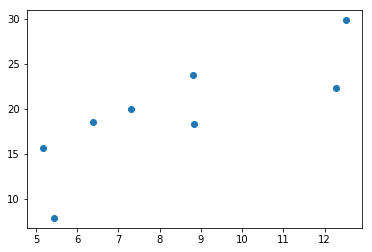

In [107]:
# 來看看產生的x-y分佈
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

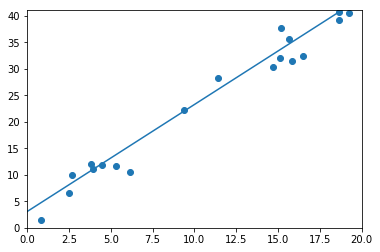

1.9918575286865234 2.954965829849243


In [108]:
# 隨機初始化參數
w = t.rand(1, 1) 
b = t.zeros(1, 1)

lr =0.001 # 學習率

for ii in range(20000):
    x, y = get_fake_data()
    
    # forward：計算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等價於x.mm(w);for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # 均方誤差
    loss = loss.sum()
    
    # backward：手動計算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新參數
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%1000 ==0:
       
        # 畫圖
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=20) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        
print(w.squeeze()[0], b.squeeze()[0])

可見程式已經基本學出w=2、b=3，並且圖中直線和資料已經實現較好的擬合。

雖然上面提到了許多操作，但是只要掌握了這個例子基本上就可以了，其他的知識，讀者日後遇到的時候，可以再看看這部份的內容或者查找對應文檔。
